In [51]:
import pandas as pd

In [91]:
df = pd.read_csv('dataset.csv', dtype={'Mise en circulation': 'string'})

In [92]:
df['Mise en circulation'].unique()

<StringArray>
['01.2014', '12.2023', '06.2020', '11.2020', '12.2022', '04.2018', '10.2019',
 '10.2022', '11.2021', '12.2011',
 ...
 '06.2008', '08.2007', '02.2013', '06.2005', '04.2005', '10.2006', '10.1999',
 '06.2007', '10.2007', '01.2007']
Length: 254, dtype: string

In [53]:
print(df.head())

     prix Kilométrage  Mise en circulation          Énergie Boite vitesse  \
0  29 500   114 550km               1.2014          Essence      Manuelle   
1  50 000     3 500km              12.2023          Essence      Manuelle   
2  92 000    22 000km               6.2020  Hybride essence   Automatique   
3  34 000    46 000km              11.2020          Essence      Manuelle   
4  67 000    44 000km              12.2022          Essence      Manuelle   

  Puissance fiscale Transmission Carrosserie Date de l'annonce Gouvernorat  \
0               5cv     Traction    Citadine        16.12.2024      Ariana   
1               5cv     Traction     Berline        16.12.2024      Nabeul   
2               5cv    Intégrale     SUV/4x4        16.12.2024   Ben Arous   
3               5cv     Traction     SUV/4x4        16.12.2024      Ariana   
4               7cv     Traction     SUV/4x4        16.12.2024   Ben Arous   

   ... Détecteur de pluie Fermeture centralisée Ordinateur de bord  

In [54]:
print(df.shape)

(1725, 86)


In [55]:
df.columns

Index(['prix', 'Kilométrage', 'Mise en circulation', 'Énergie',
       'Boite vitesse', 'Puissance fiscale', 'Transmission', 'Carrosserie',
       'Date de l'annonce', 'Gouvernorat', 'Marque', 'Modèle',
       'Couleur extérieure', 'Couleur intérieure', 'Sellerie',
       'Nombre de places', 'Nombre de portes', 'Cylindrée', 'ABS',
       'Airbags frontaux', 'Airbags latéraux', 'Airbags rideaux',
       'Alarme anti-intrusion', 'Anti-démarrage électronique', 'Anti-patinage',
       'Contrôle de pression des pneus', 'Fixations ISOFIX',
       'Pneumatiques runflat', 'Radiateur tropicalisé', 'Caméra de recul',
       'Caméras 360', 'Coffre électrique', 'Jantes en alliage',
       'Radar de recul', 'Peinture métallisée', 'Feux à LED',
       'Phares au xénon', 'Phares Full LED', 'Antibrouillards', 'Lave Phares',
       'Toit ouvrant', 'Toit panoramique', 'Vitres teintées',
       'Accoudoir avant', 'Accoudoir arrière', 'Affichage tête haute',
       'Autoradio', 'Autoradio CD', 'Autoradio 

In [56]:
df.dtypes

prix                         object
Kilométrage                  object
Mise en circulation         float64
Énergie                      object
Boite vitesse                object
                             ...   
Rétroviseurs électriques     object
Rétroviseurs rabattables     object
Vitres électriques           object
Suspension pneumatique       object
Parkassist                   object
Length: 86, dtype: object

## II) Data Cleaning

#### 1) Converting columns with data type 'object' to string format

In [262]:
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column type is 'object'
        df[col] = df[col].astype('string')

prix                      string[python]
Kilométrage               string[python]
Mise en circulation       datetime64[ns]
Énergie                   string[python]
Boite vitesse             string[python]
                               ...      
Vitres électriques                 Int64
Suspension pneumatique             Int64
Parkassist                         Int64
age (Mois)                         Int64
age                                Int64
Length: 86, dtype: object

#### 2) Cleaning the column "Prix"

In [268]:
# remove spaces
df['prix'] = df['prix'].str.replace(' ', '', regex=False)
# converting the type from string to float
df['prix'] = df['prix'].astype('float64')

prix                             float64
Kilométrage               string[python]
Mise en circulation       datetime64[ns]
Énergie                   string[python]
Boite vitesse             string[python]
                               ...      
Vitres électriques                 Int64
Suspension pneumatique             Int64
Parkassist                         Int64
age (Mois)                         Int64
age                                Int64
Length: 86, dtype: object

#### 3) Cleaning the column "Kilométrage"

In [307]:
df['Kilométrage'] = df['Kilométrage'].str.replace(' ','', regex=False)
df['Kilométrage'] = df['Kilométrage'].str.replace('km$', '', regex=True)
df['Kilométrage'] = df['Kilométrage'].astype('float64');

#### 4) Cleaning the column "Mise en circulation" to calculate the age of the car

In [93]:
print(df['Mise en circulation'].unique())

<StringArray>
['01.2014', '12.2023', '06.2020', '11.2020', '12.2022', '04.2018', '10.2019',
 '10.2022', '11.2021', '12.2011',
 ...
 '06.2008', '08.2007', '02.2013', '06.2005', '04.2005', '10.2006', '10.1999',
 '06.2007', '10.2007', '01.2007']
Length: 254, dtype: string


In [104]:
from datetime import datetime
df['Mise en circulation'] = pd.to_datetime(df['Mise en circulation'], format='%m.%Y')
current_date = datetime.now()
# calculating the age of each car
df['age'] = current_date.year - df['Mise en circulation'].dt.year

In [105]:
df['age']

0       10
1        1
2        4
3        4
4        2
        ..
1720     4
1721     4
1722     7
1723    11
1724     8
Name: age, Length: 1725, dtype: int32

#### 5) Cleaning the column "Énergie"

In [110]:
df['Énergie'].unique()

<StringArray>
[                     'Essence',              'Hybride essence',
  'Hybride rechargeable diesel',                       'Diesel',
 'Hybride rechargeable essence',               'Hybride diesel']
Length: 6, dtype: string

In [115]:
fuel_mapping = {
    'Essence': 'Essence',
    'Hybride essence': 'Hybride',
    'Hybride rechargeable diesel': 'Hybride',
    'Diesel': 'Diesel',
    'Hybride rechargeable essence': 'Hybride',
    'Hybride diesel': 'Hybride'
}
df['Énergie'] = df['Énergie'].replace(fuel_mapping)

<StringArray>
['Essence', 'Hybride', 'Diesel']
Length: 3, dtype: string

#### 6) cleaning the column "Puissance fiscale"

In [121]:
df['Puissance fiscale'].unique()

<StringArray>
[         '5',          '7',          '6',          '8',          '9',
         '11',          '4',         '10',         '32',         '12',
         '14',         '16',         '15',         '21',         '18',
         '19',         '22',         '20',         '13',         '30',
         '17',         '34',         '24',         '31',         '28',
         '25',         '33',         '47',         '23',         '43',
         '41',         '26',         '48', 'plus de 48',         '29']
Length: 35, dtype: string

In [128]:
df['Puissance fiscale'] = df['Puissance fiscale'].str.replace('cv', '', case=False)
df['Puissance fiscale'] = df['Puissance fiscale'].replace('plus de 48', '50')
df['Puissance fiscale'] = df['Puissance fiscale'].astype('Int64')
df['Puissance fiscale'].unique()

<IntegerArray>
[ 5,  7,  6,  8,  9, 11,  4, 10, 32, 12, 14, 16, 15, 21, 18, 19, 22, 20, 13,
 30, 17, 34, 24, 31, 28, 25, 33, 47, 23, 43, 41, 26, 48, 50, 29]
Length: 35, dtype: Int64

#### 7) Deleting unnecessary columns

In [135]:
df = df.drop('Date de l\'annonce', axis=1)
df = df.drop('Gouvernorat', axis=1)
df.columns

Index(['prix', 'Kilométrage', 'Mise en circulation', 'Énergie',
       'Boite vitesse', 'Puissance fiscale', 'Transmission', 'Carrosserie',
       'Marque', 'Modèle', 'Couleur extérieure', 'Couleur intérieure',
       'Sellerie', 'Nombre de places', 'Nombre de portes', 'Cylindrée', 'ABS',
       'Airbags frontaux', 'Airbags latéraux', 'Airbags rideaux',
       'Alarme anti-intrusion', 'Anti-démarrage électronique', 'Anti-patinage',
       'Contrôle de pression des pneus', 'Fixations ISOFIX',
       'Pneumatiques runflat', 'Radiateur tropicalisé', 'Caméra de recul',
       'Caméras 360', 'Coffre électrique', 'Jantes en alliage',
       'Radar de recul', 'Peinture métallisée', 'Feux à LED',
       'Phares au xénon', 'Phares Full LED', 'Antibrouillards', 'Lave Phares',
       'Toit ouvrant', 'Toit panoramique', 'Vitres teintées',
       'Accoudoir avant', 'Accoudoir arrière', 'Affichage tête haute',
       'Autoradio', 'Autoradio CD', 'Autoradio CD/Mp3', 'Apple Carplay',
       'Android A

#### 8) Cleaning the column "Nombre de places"

In [141]:
df['Nombre de places'].unique()

array([ 5.,  7.,  4.,  3.,  2., nan,  9.,  6.])

In [159]:
# replacing NA values with the most frequent value
mode_value = df['Nombre de places'].mode()[0]
df['Nombre de places'] = df['Nombre de places'].fillna(mode_value)
df['Nombre de places'] = df['Nombre de places'].astype('Int64')
df['Nombre de places'].unique()

<IntegerArray>
[5, 7, 4, 3, 2, 9, 6]
Length: 7, dtype: Int64

#### 9) Cleaning the column "Nombre de portes"

In [167]:
# replacing NA values with the most frequent value
mode_value = df['Nombre de portes'].mode()[0]
df['Nombre de portes'] = df['Nombre de portes'].fillna(mode_value)
df['Nombre de portes'] = df['Nombre de portes'].astype('Int64')
df['Nombre de portes'].unique()

<IntegerArray>
[5, 4, 3, 2]
Length: 4, dtype: Int64

In [169]:
df['Cylindrée'].isna().any()

np.True_

In [186]:
for column in df.columns[16:]:
    df[column] = df[column].replace({'true': '1'})
    df[column] = df[column].fillna('0')
    df[column] = df[column].astype('Int64')

0       0
1       0
2       0
3       1
4       1
       ..
1720    1
1721    1
1722    1
1723    1
1724    1
Name: ABS, Length: 1725, dtype: Int64

In [302]:
options_columns = df.iloc[:, 16:83]
df['num_options'] = options_columns.sum(axis=1)
df.head()

,prix,Kilométrage,Mise en circulation,Énergie,Boite vitesse,Puissance fiscale,Transmission,Carrosserie,Marque,Modèle,...,Régulateur de vitesse,Conduite semi-autonome,Rétroviseurs électriques,Rétroviseurs rabattables,Vitres électriques,Suspension pneumatique,Parkassist,age (Mois),age,num_options
0,29500.0,114 550km,2014-01-01,Essence,Manuelle,5,Traction,Citadine,Citroën,C3,...,0,0,0,0,0,0,0,131,10,0
1,50000.0,3 500km,2023-12-01,Essence,Manuelle,5,Traction,Berline,Suzuki,Dzire,...,1,0,1,0,1,0,0,12,1,18
2,92000.0,22 000km,2020-06-01,Hybride,Automatique,5,Intégrale,SUV/4x4,Hyundai,Kona Electric,...,0,0,0,0,0,0,0,54,4,0
3,34000.0,46 000km,2020-11-01,Essence,Manuelle,5,Traction,SUV/4x4,Mahindra,KUV 100,...,0,0,1,1,1,0,0,49,4,15
4,67000.0,44 000km,2022-12-01,Essence,Manuelle,7,Traction,SUV/4x4,Ford,Ecosport,...,1,0,0,1,1,0,0,24,2,38


## II) Data Visualization to understand the relationships between Variables

#### 1) Distribution of categorical variables

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Count of Different traction types')

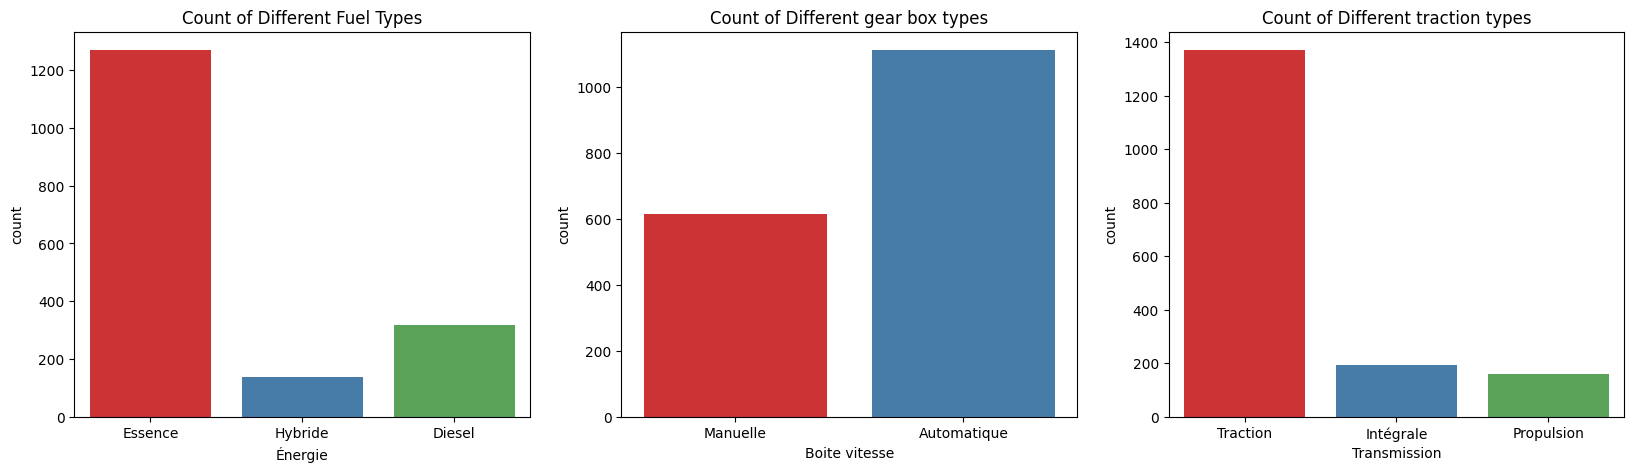

In [275]:
plt.figure(figsize=(20,5))
# count plot for the fuel type
plt.subplot(1,3,1)
sns.countplot(data=df, x='Énergie', hue='Énergie', palette='Set1', legend=False)
plt.title("Count of Different Fuel Types")
# count plot for gears box
plt.subplot(1,3,2)
sns.countplot(data=df, x='Boite vitesse', hue='Boite vitesse', palette='Set1', legend=False)
plt.title("Count of Different gear box types")

# count plot for transmission type
plt.subplot(1,3,3)
sns.countplot(data=df, x='Transmission', hue='Transmission', palette='Set1', legend=False)
plt.title("Count of Different traction types")


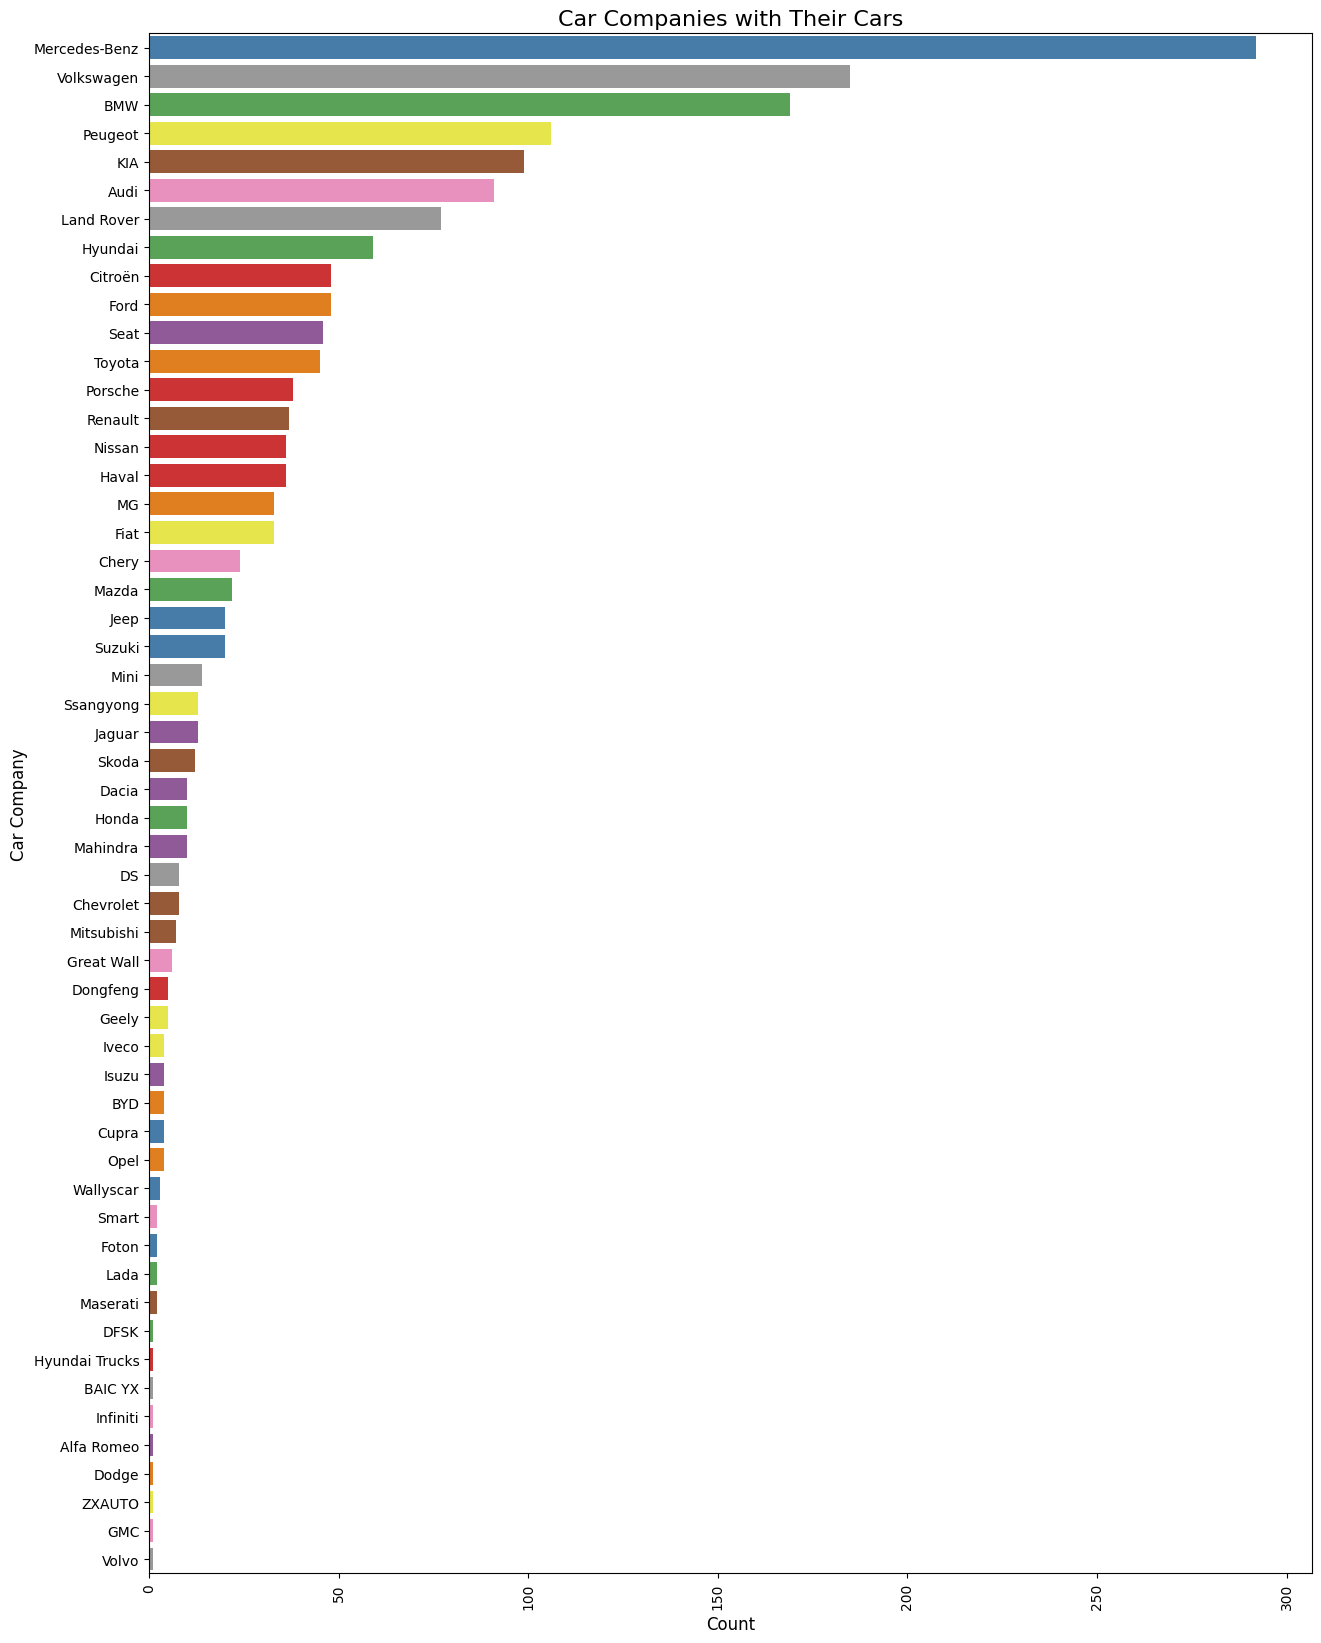

In [240]:
# Set figure size
plt.figure(figsize=(15,20))

# Create a count plot for the car models
sns.countplot(data=df, y='Marque', hue= 'Marque', palette='Set1', order=df['Marque'].value_counts().index)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Title and labels
plt.title('Car Companies with Their Cars', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Car Company', fontsize=12)

# Display the plot
plt.show()

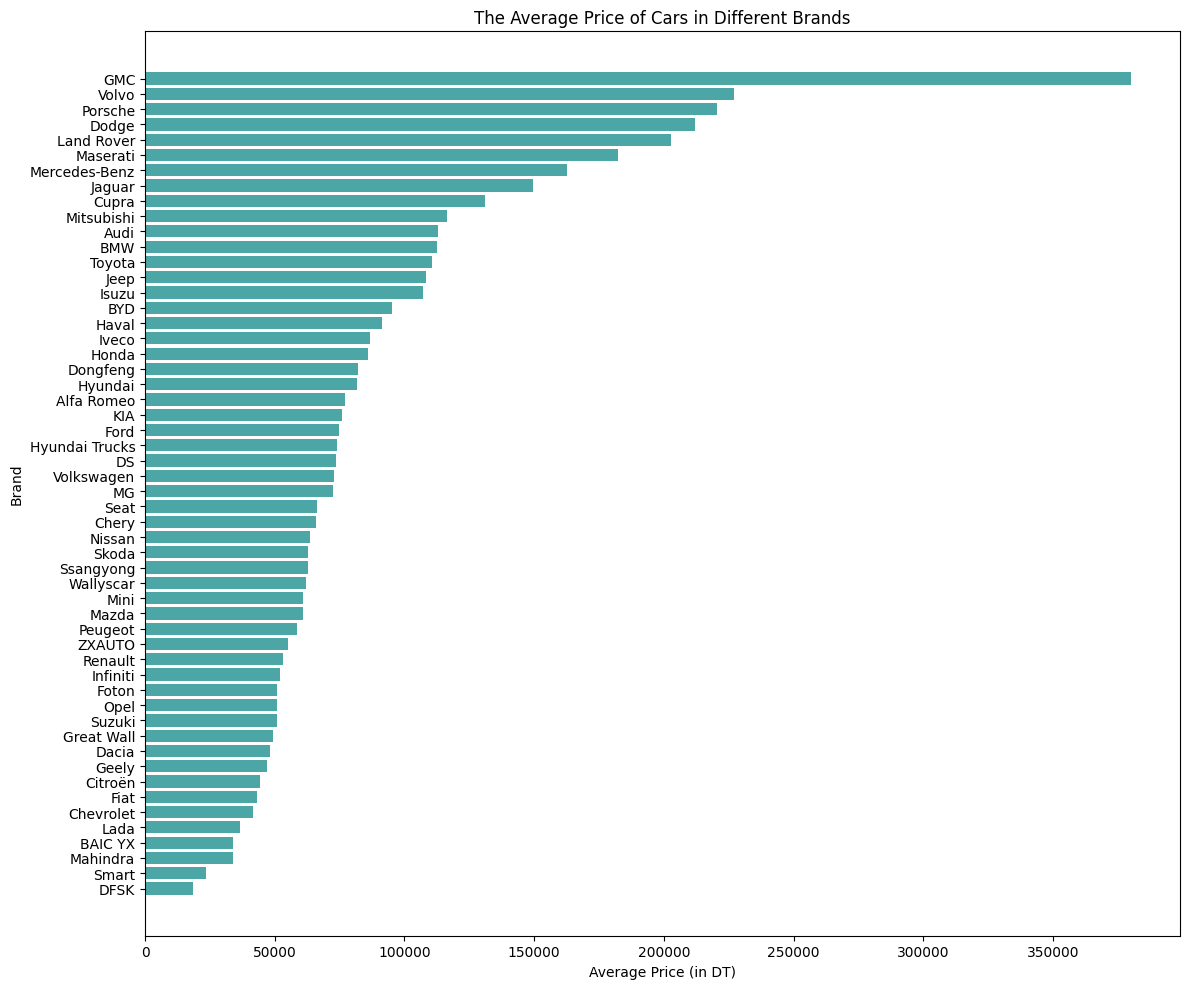

In [274]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by 'Marque' (Brand) and calculate the average price
average_prices_by_brand = df.groupby('Marque')['prix'].mean()

# Sort the average prices in ascending order
average_prices_by_brand = average_prices_by_brand.sort_values(ascending=True)

# Plotting a horizontal bar chart
plt.figure(figsize=(12, 10))  # Adjust figure size
plt.barh(average_prices_by_brand.index, average_prices_by_brand.values, color='teal', alpha=0.7)

# Add title and labels
plt.title("The Average Price of Cars in Different Brands")
plt.xlabel("Average Price (in DT)")
plt.ylabel("Brand")

# Adjust layout to avoid text cutoff
plt.tight_layout()

# Show the plot
plt.show()


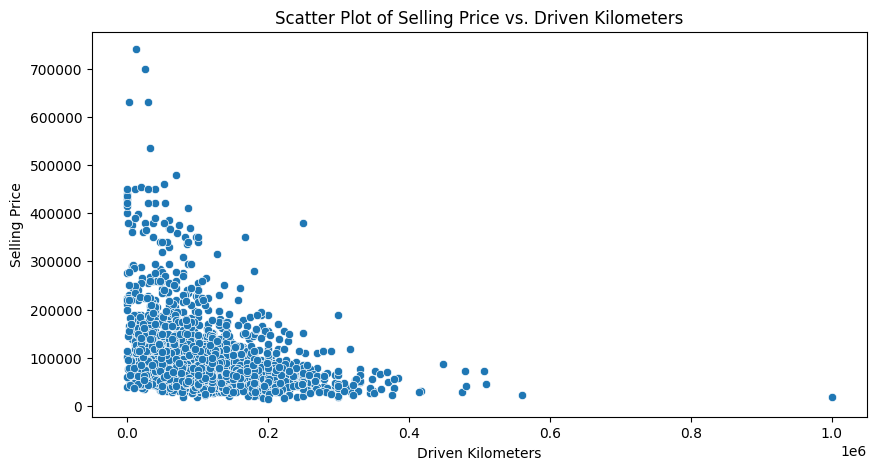

In [308]:
# Chart - 5 Scatter plot visualization code for Driven Kilometers vs Selling Price
# Set the figure size for the plot
plt.figure(figsize=(10,5))

# Create a scatter plot to visualize the relationship between Driven_kms and Selling_Price
sns.scatterplot(data=df, x='Kilométrage', y='prix')

# Set labels for the x and y axes
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')

# Add a title to the plot
plt.title('Scatter Plot of Selling Price vs. Driven Kilometers')

# Display the plot
plt.show()

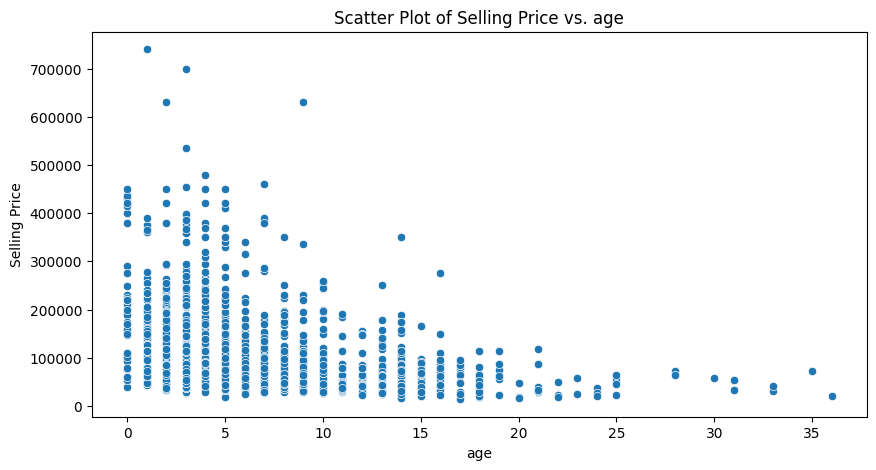

In [309]:
# Chart - 5 Scatter plot visualization code for Driven Kilometers vs Selling Price
# Set the figure size for the plot
plt.figure(figsize=(10,5))

# Create a scatter plot to visualize the relationship between Driven_kms and Selling_Price
sns.scatterplot(data=df, x='age', y='prix')

# Set labels for the x and y axes
plt.xlabel('age')
plt.ylabel('Selling Price')

# Add a title to the plot
plt.title('Scatter Plot of Selling Price vs. age')

# Display the plot
plt.show()

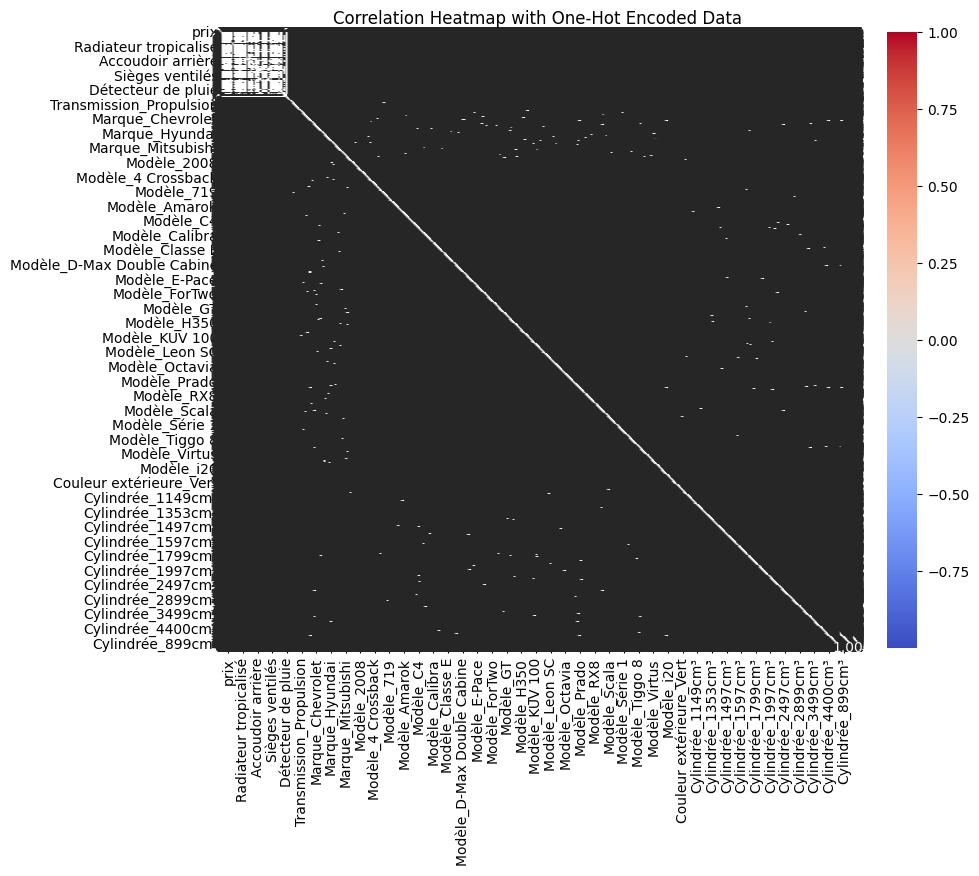

In [312]:
# Perform one-hot encoding on the categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap with One-Hot Encoded Data")
plt.show()